## 3- Exploratory Data Analysis   
In this part, we will be using:  
- Univariate analysis, which is about analysing only one variable in order to understand its distribution (numerical variables) using histogram, or understand other information such as percentages values(categorical variables).  

- Bivariate analysis, which is about understanding the interaction between two variables.  


In [6]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

In [5]:
# Load the data without outliers.  
df_no_outliers = pd.read_csv('data/without_missing_outliers.csv')
df_no_outliers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48595 entries, 0 to 48594
Data columns (total 15 columns):
Age               48595 non-null int64
Workclass         48595 non-null object
fnlwgt            48595 non-null int64
Education         48595 non-null object
Education-Num     48595 non-null int64
Martial Status    48595 non-null object
Occupation        48595 non-null object
Relationship      48595 non-null object
Race              48595 non-null object
Sex               48595 non-null object
Capital-Gain      48595 non-null int64
Capital-Loss      48595 non-null int64
Hours-per-week    48595 non-null int64
Country           48595 non-null object
Income            48595 non-null object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


Before starting the analysis for our features, let's have a look at the number of people who make more than 50K and those who do not, by using **seaborn** **countplot()** function. 

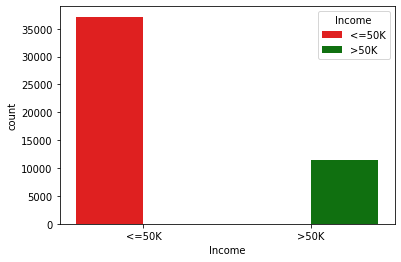

In [7]:
palette = {"<=50K": "r", ">50K": "g"} 
sns.countplot(x="Income", data=df_no_outliers, hue="Income", palette=palette)

We can notice that we have more than 35000 adults who make less than 50K dollars and only a few of them make more than 50K dollars. So,only 24% of adult make more than 50K dollars.

#### A- Numerical Data   
In this part, we will be performing centrality measure (mean, median) and dispersion measures (range, percentiles, variance, standard deviation).  
All those information can be found with pandas **describe()** function.  

In [8]:
df_no_outliers.describe()

,Age,fnlwgt,Education-Num,Capital-Gain,Capital-Loss,Hours-per-week
count,48595.000000,4.859500e+04,48595.000000,48595.000000,48595.000000,48595.000000
mean,38.603375,1.896813e+05,10.063422,579.897829,87.947073,40.371026
std,13.712317,1.056323e+05,2.562615,2516.463352,403.979066,12.367802
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175490e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.782070e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.377130e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,34095.000000,4356.000000,99.000000


From this result, we can see that our features are in different scales, so that information will be useful for feature engineering step. For simple visualization purpose, we can plot the probability density of all those features. 

##### A.1- Univariate Analysis 

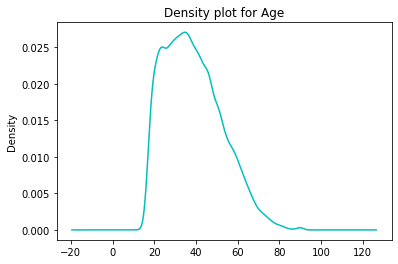

In [9]:
# Age  
df_no_outliers.Age.plot(kind='kde', title='Density plot for Age', color='c')

Here, we have a positive skewed distribution for Age feature. 

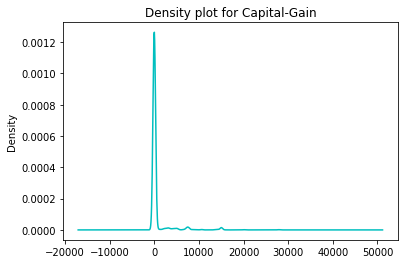

In [10]:
# Capital-Gain  
df_no_outliers['Capital-Gain'].plot(kind='kde', title='Density plot for Capital-Gain', color='c')

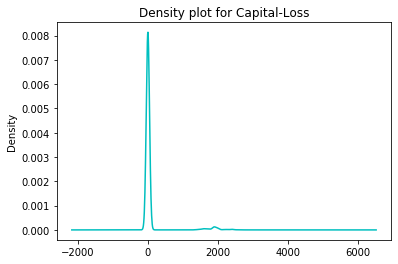

In [11]:
# Capital-Loss  
df_no_outliers['Capital-Loss'].plot(kind='kde', title='Density plot for Capital-Loss', color='c')

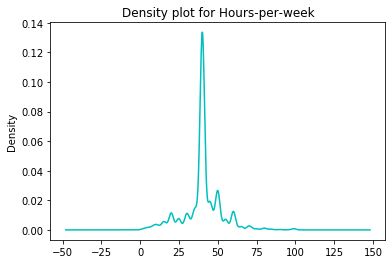

In [12]:
# Capital-Loss  
df_no_outliers['Hours-per-week'].plot(kind='kde', title='Density plot for Hours-per-week', color='c')

We need to deal with the problem of distribution for all our numerical data values in the feature engineering part. 

##### A.2- Bivariate analysis  
We will try to determine the correlation between some numerical data.

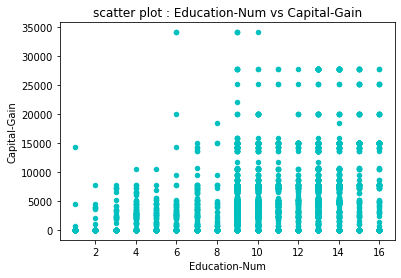

In [13]:
# Capital-Gain and Education-Num 
# use scatter plot for bi-variate distribution
df_no_outliers.plot.scatter(x='Education-Num', y='Capital-Gain', color='c', title='scatter plot : Education-Num vs Capital-Gain');

We have a positive relationship between the number of year of education and the Capital Gain. The more educated you are, your are likely to have more capital. 

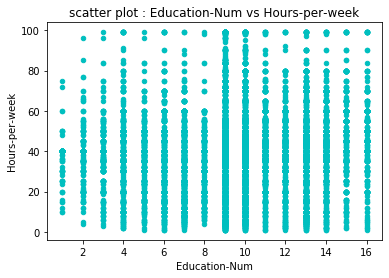

In [14]:
# Hours-per-week and Education-Num 
# use scatter plot for bi-variate distribution
df_no_outliers.plot.scatter(x='Education-Num', y='Hours-per-week', color='c', title='scatter plot : Education-Num vs Hours-per-week');

There is no interesting pattern. 

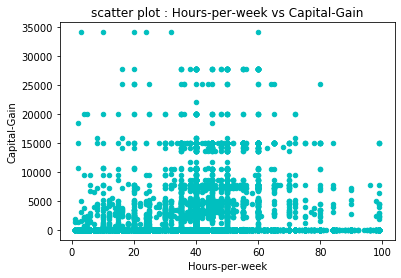

In [15]:
# Capital-Gain and Hours-per-week
# use scatter plot for bi-variate distribution
df_no_outliers.plot.scatter(x='Hours-per-week', y='Capital-Gain', color='c', title='scatter plot : Hours-per-week vs Capital-Gain');

When the hours per week increases, the capital gain slighly decreases. 

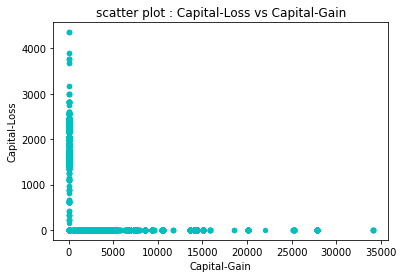

In [16]:
# Capital-Gain and Capital-Loss
# use scatter plot for bi-variate distribution
df_no_outliers.plot.scatter(x='Capital-Gain', y='Capital-Loss', color='c', title='scatter plot : Capital-Loss vs Capital-Gain');

People without any capital Gain lose a lot of money, which is obvious, because without any capital Gain, you would need to borrow with interest, and then keep **"surviving".** 

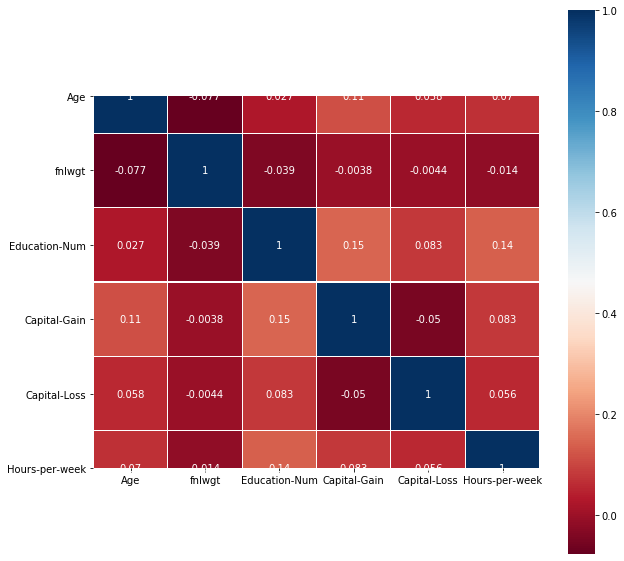

In [22]:
numerical_cols = ['int64']  
plt.figure(figsize=(10, 10))
sns.heatmap( 
            df_no_outliers.select_dtypes(include=numerical_cols).corr(),
            cmap=plt.cm.RdBu, 
            vmax=1.0,
            linewidths=0.1,
            linecolor='white', 
            square=True,
            annot=True
)

From the correlation matrix, we can see that the level of relationship is very low between the numerical features.  

#### B- Categorical Data

There are many explorations we can do in order to have a better understanding of the data.   
Here are some possibilities we could have:  
* B.1- Income VS Occupation for countries in each continent
* B.2- Income VS Workclass for countries in each continent
* B.3- Income VS Marital Status for countries in each continent
* B.4- Mean Capital Gain VS Martial Status for each continent

In [23]:
df_no_outliers.head()

,Age,Workclass,fnlwgt,Education,Education-Num,Martial Status,Occupation,Relationship,Race,Sex,Capital-Gain,Capital-Loss,Hours-per-week,Country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


We have many countries from different continent. For better visualization, it might be interesting to create a new column **Continent** in order to easily group information per continent and the corresponding countries. 

In [24]:
df_no_outliers['Country'].unique()

array(['United-States', 'Cuba', 'Jamaica', 'India', 'Mexico', 'South',
       'Puerto-Rico', 'Honduras', 'England', 'Canada', 'Germany', 'Iran',
       'Philippines', 'Italy', 'Poland', 'Columbia', 'Cambodia',
       'Thailand', 'Ecuador', 'Laos', 'Taiwan', 'Haiti', 'Portugal',
       'Dominican-Republic', 'El-Salvador', 'France', 'Guatemala',
       'China', 'Japan', 'Yugoslavia', 'Peru',
       'Outlying-US(Guam-USVI-etc)', 'Scotland', 'Trinadad&Tobago',
       'Greece', 'Nicaragua', 'Vietnam', 'Hong', 'Ireland', 'Hungary',
       'Holand-Netherlands'], dtype=object)

There is country name called **South** which is definitly an error. It could be considered as **continent**, then we could associate in with the corresponding continent. But, here is the problem: we have both **South-America**, **South-Asia** that could be possible values. In order to avoid including more errors in our data, it might be better to remove the corresponding observations in case that action does not lead to loosing too much data.  

In [25]:
south_df = df_no_outliers[df_no_outliers['Country']=='South']
a = south_df.shape[0]
b = df_no_outliers.shape[0]

print('{} rows corresponds to South, which represents {}% of the data'.format(a, (1.0*a/b)*100))

113 rows corresponds to South, which represents 0.2325342113386151% of the data


We can remove all the corresponding rows for **Country == South** because, it corresponds to only 0.244% of the original dataset.

In [26]:
south_index = south_df.index 
df_no_outliers.drop(south_index, inplace=True)

We are going to perform the following preprocessing:  
* Outlying-US(Guam-USVI-etc) ==> Outlying-US   
* Trinadad&Tobago ==> Trinadad-Tobago  
* Hong ==> Hong-Kong

In [27]:
# Changing the corresponding values.
df_no_outliers.loc[df_no_outliers['Country']=='Outlying-US(Guam-USVI-etc)', 'Country'] = 'Outlying-US'
df_no_outliers.loc[df_no_outliers['Country']=='Trinadad&Tobago', 'Country'] = 'Trinadad-Tobago'
df_no_outliers.loc[df_no_outliers['Country']=='Hong', 'Country'] = 'Hong-Kong'

In [28]:
# Check if the process worked
df_no_outliers['Country'].unique()

array(['United-States', 'Cuba', 'Jamaica', 'India', 'Mexico',
       'Puerto-Rico', 'Honduras', 'England', 'Canada', 'Germany', 'Iran',
       'Philippines', 'Italy', 'Poland', 'Columbia', 'Cambodia',
       'Thailand', 'Ecuador', 'Laos', 'Taiwan', 'Haiti', 'Portugal',
       'Dominican-Republic', 'El-Salvador', 'France', 'Guatemala',
       'China', 'Japan', 'Yugoslavia', 'Peru', 'Outlying-US', 'Scotland',
       'Trinadad-Tobago', 'Greece', 'Nicaragua', 'Vietnam', 'Hong-Kong',
       'Ireland', 'Hungary', 'Holand-Netherlands'], dtype=object)

We can clearly see that the changes have been made.   
From the lists below, each country has been associated with the corresponding contient in order to make the analysis more easier.

In [29]:
asia = ['India', 'Iran', 'Philippines', 'Cambodia', 'Thailand', 'Laos', 'Taiwan', 
       'China', 'Japan', 'Vietnam', 'Hong-Kong']  

america = ['United-States', 'Cuba', 'Jamaica', 'Mexico', 'Puerto-Rico', 'Honduras', 
           'Canada', 'Columbia', 'Ecuador', 'Haiti', 'Dominican-Republic', 
           'El-Salvador', 'Guatemala', 'Peru', 'Outlying-US', 'Trinadad-Tobago', 
           'Nicaragua', '']  

europe = ['England', 'Germany', 'Italy', 'Poland', 'Portugal', 'France', 'Yugoslavia', 
          'Scotland', 'Greece', 'Ireland', 'Hungary', 'Holand-Netherlands'] 

In [30]:
# Now, create a dictionary to map each country to a Corresponding continent. 
continents = {country: 'Asia' for country in asia}
continents.update({country: 'America' for country in america})
continents.update({country: 'Europe' for country in europe})

In [31]:
# Then use Pandas map function to map continents to countries  
df_no_outliers['Continent'] = df_no_outliers['Country'].map(continents)

Here, we have the continents corresponding to all the existing contries in our dataset.

In [32]:
df_no_outliers['Continent'].unique()

array(['America', 'Asia', 'Europe'], dtype=object)

## B.1- Income VS Occupation for countries in each continent  
I created a helper fonction in order to preprocess for each country in one shot. 

In [33]:
def Occupation_VS_Income(continent):
    choice = df_no_outliers[df_no_outliers['Continent']==continent] 
    countries = list(choice['Country'].unique())

    for country in countries:
        pd.crosstab(choice[choice['Country']==country].Occupation, choice[choice['Country']==country].Income).plot(kind='bar', 
                                                                                                                       title='Income VS Occupation in {}'.format(country))

### B.1.1- For Asia

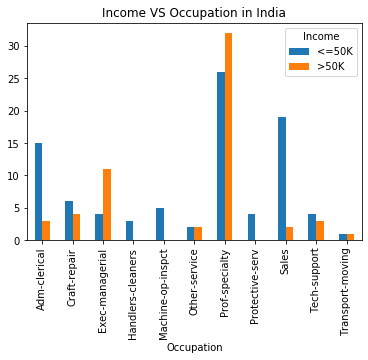

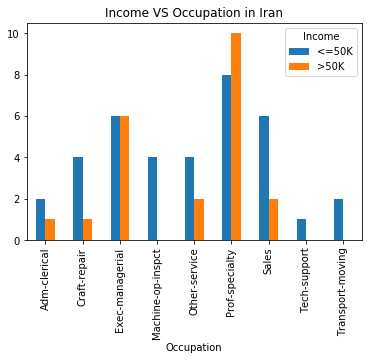

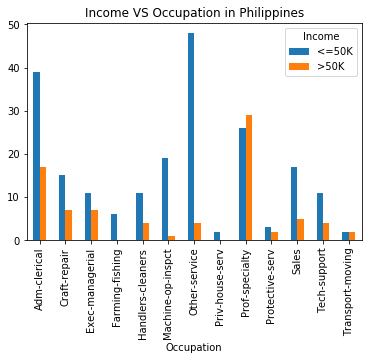

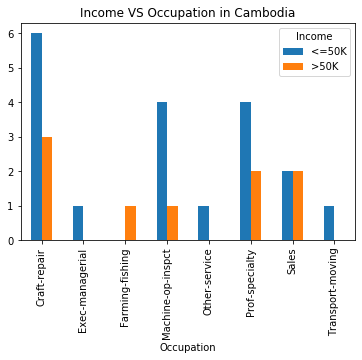

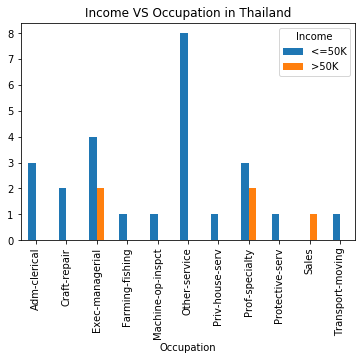

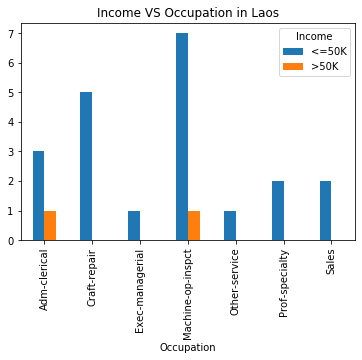

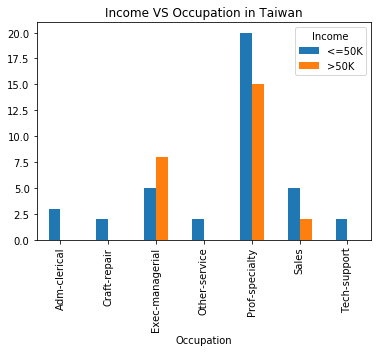

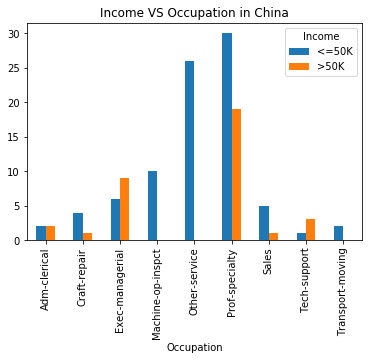

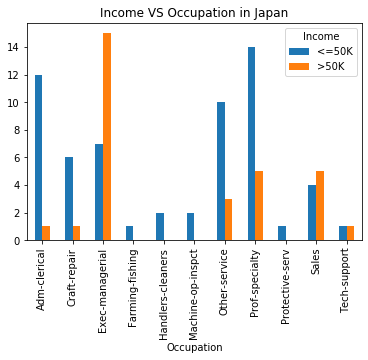

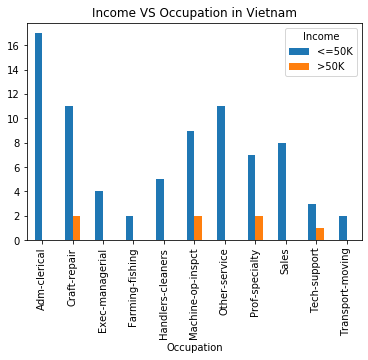

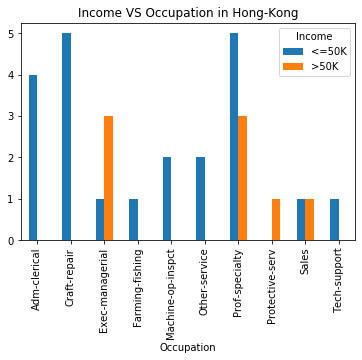

In [34]:
Occupation_VS_Income('Asia')

### B.1.2- For America

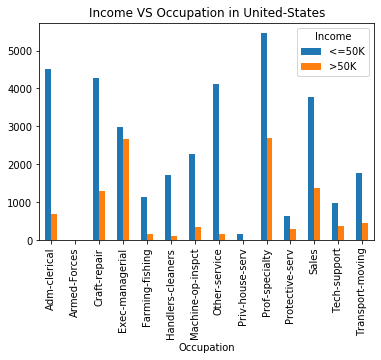

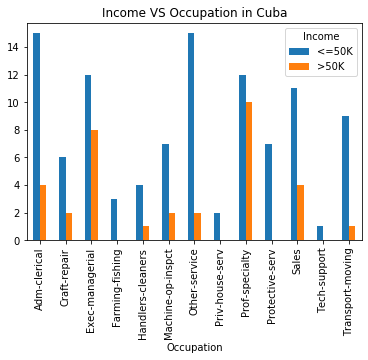

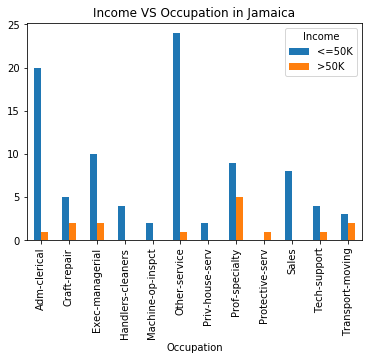

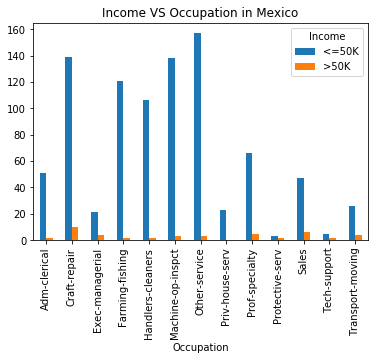

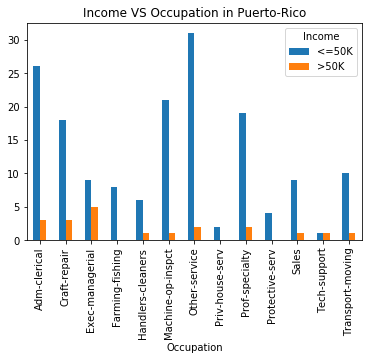

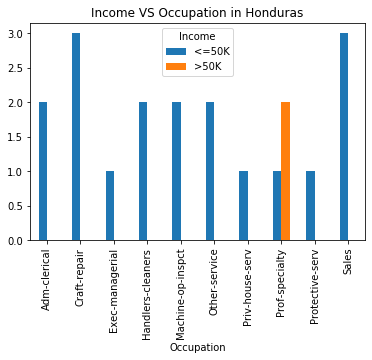

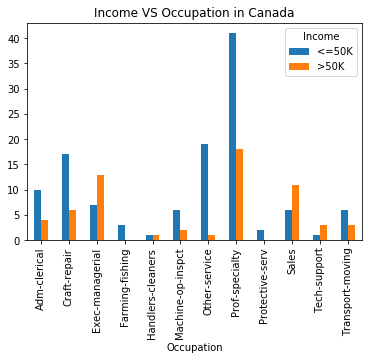

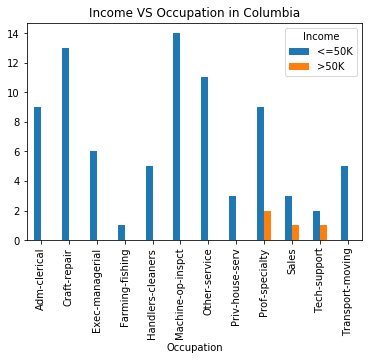

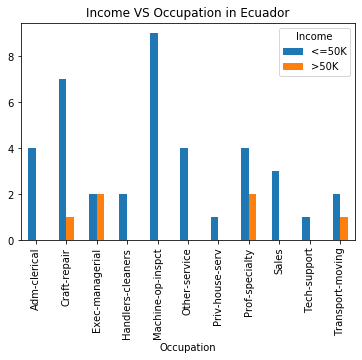

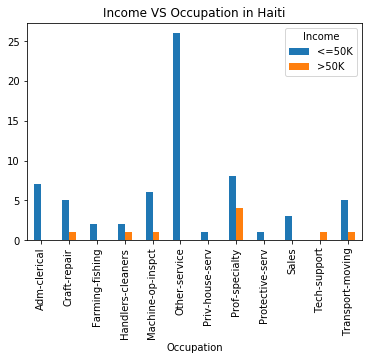

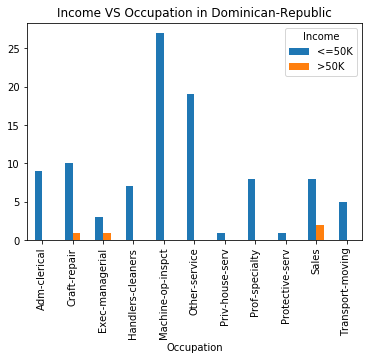

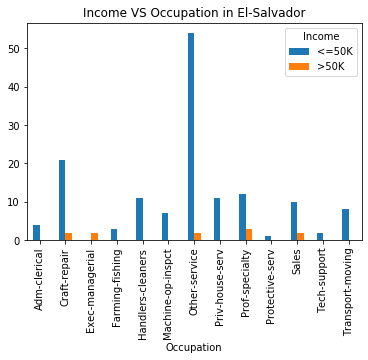

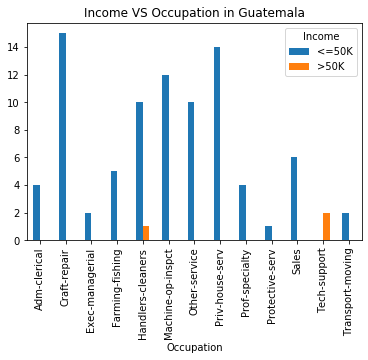

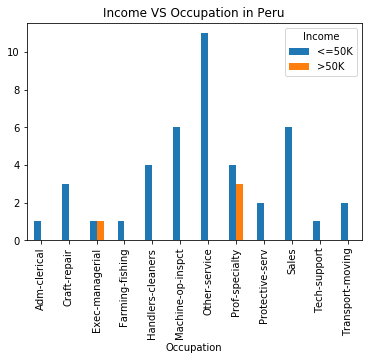

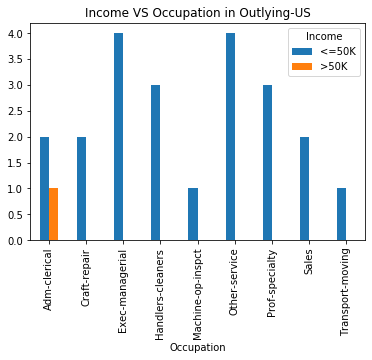

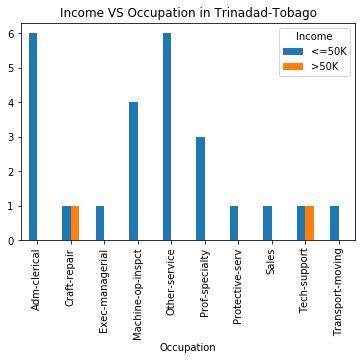

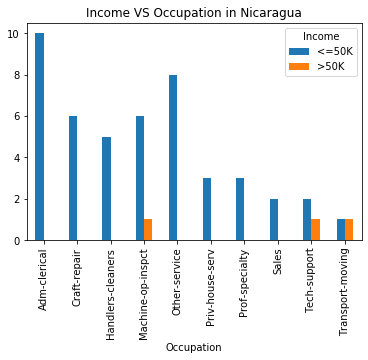

In [35]:
Occupation_VS_Income('America')

### B.1.3- For Europe

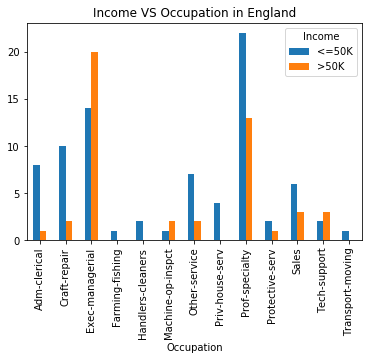

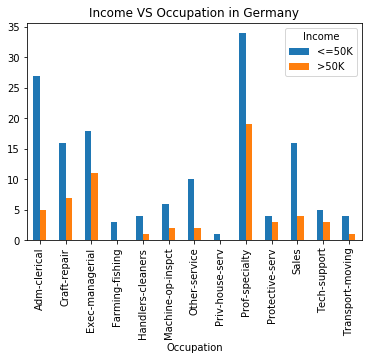

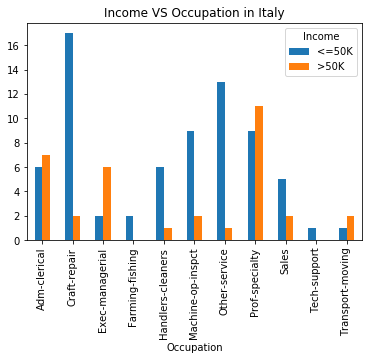

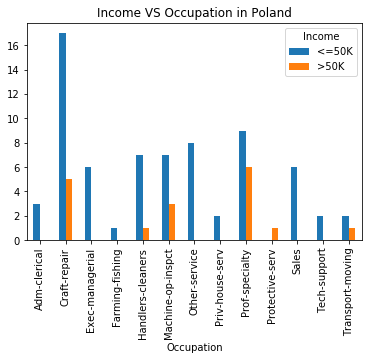

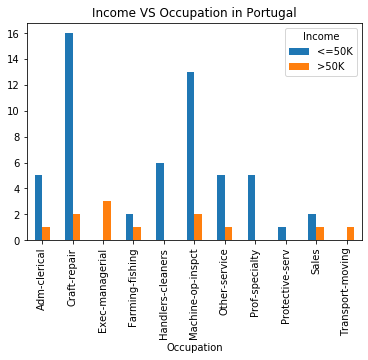

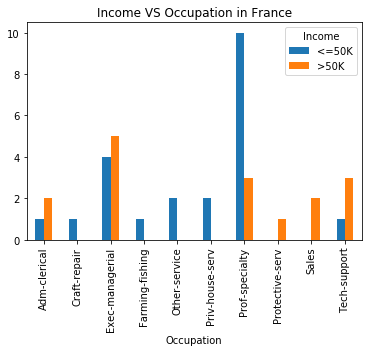

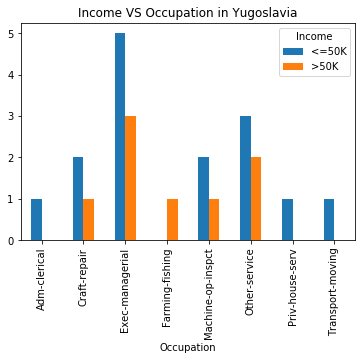

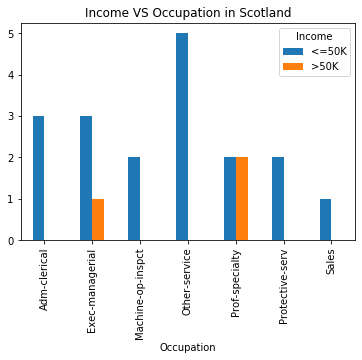

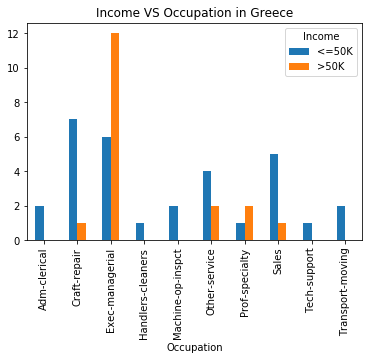

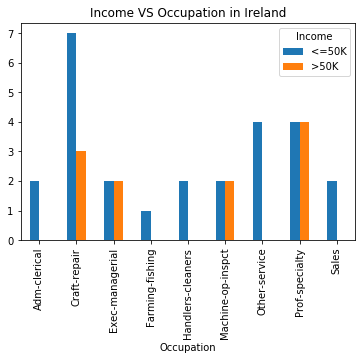

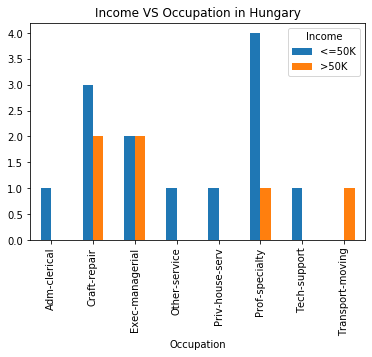

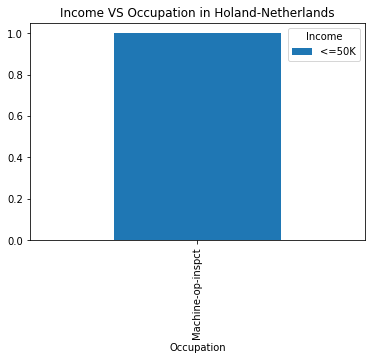

In [36]:
Occupation_VS_Income('Europe')

## B.2- Income VS Workclass for countries in each continent  

In [37]:
def Workclass_VS_Income(continent):
    choice = df_no_outliers[df_no_outliers['Continent']==continent] 
    countries = list(choice['Country'].unique())

    for country in countries:
        pd.crosstab(choice[choice['Country']==country].Workclass, choice[choice['Country']==country].Income).plot(kind='bar', 
                                                                                                                       title='Income VS Workclass in {}'.format(country))

### B.2.1- For Asia

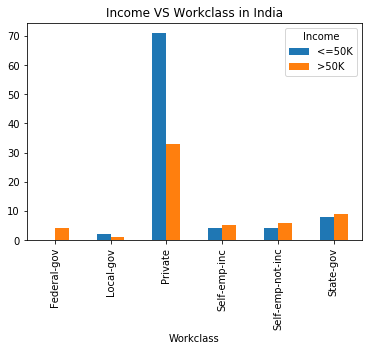

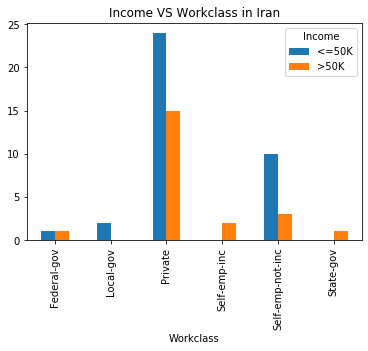

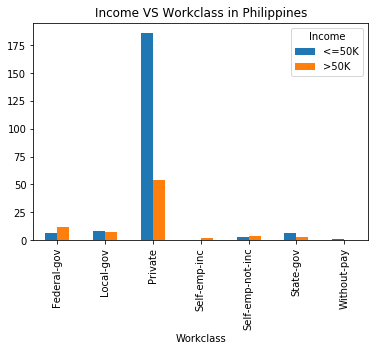

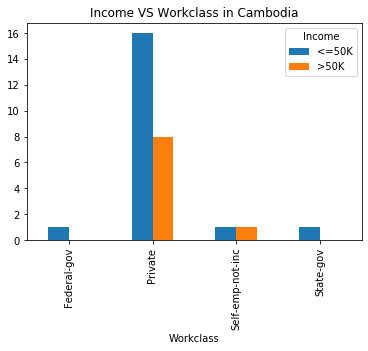

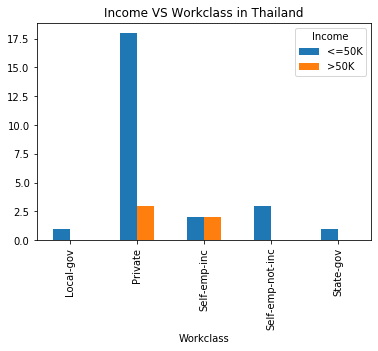

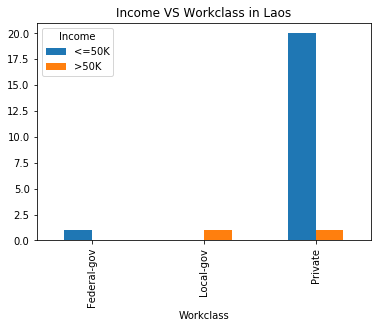

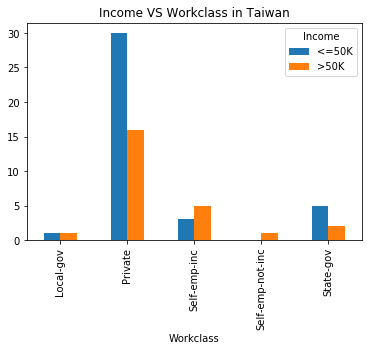

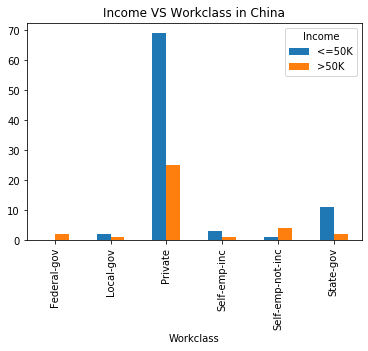

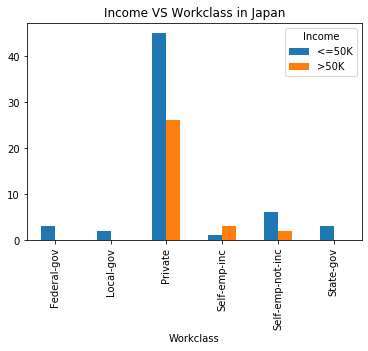

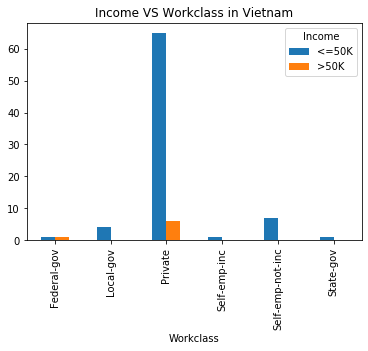

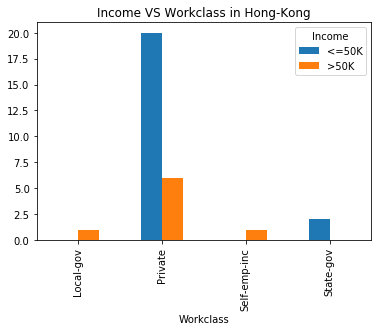

In [38]:
Workclass_VS_Income('Asia')

### B.2.2- For America

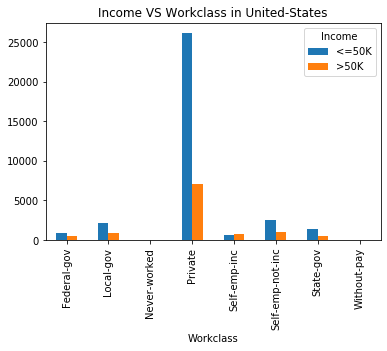

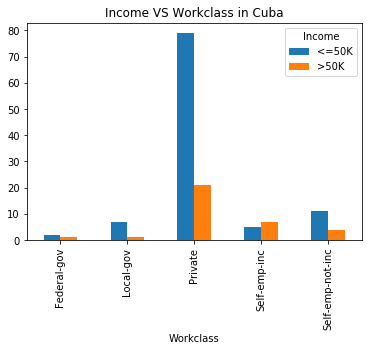

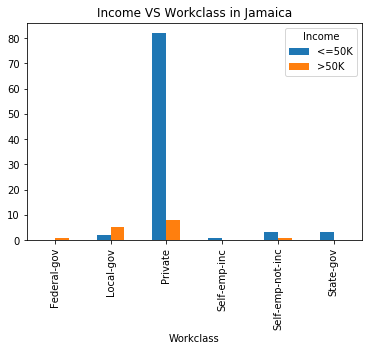

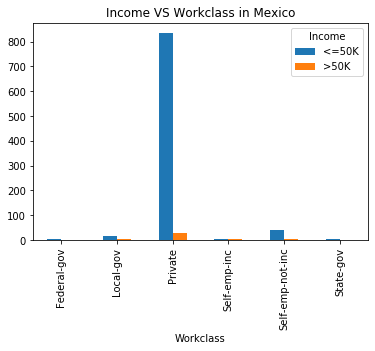

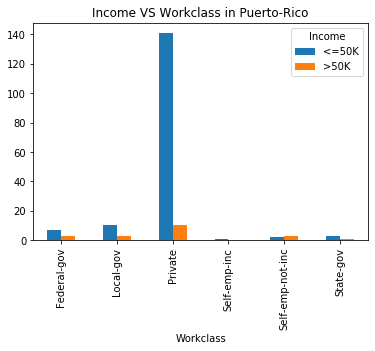

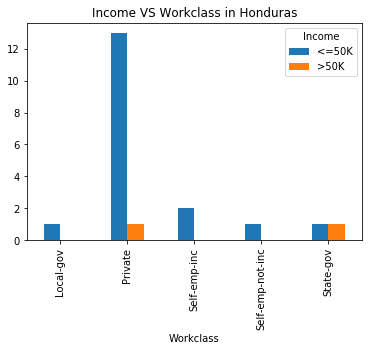

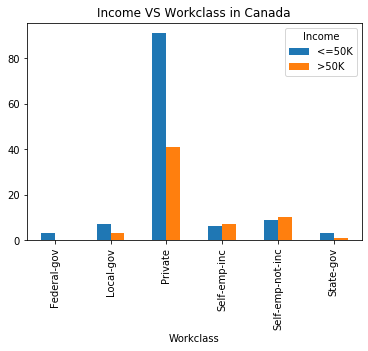

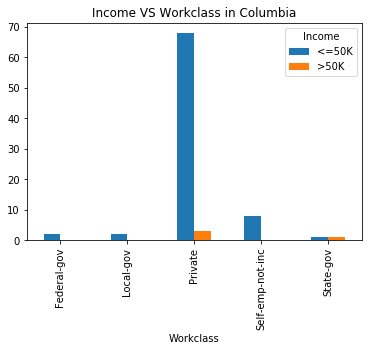

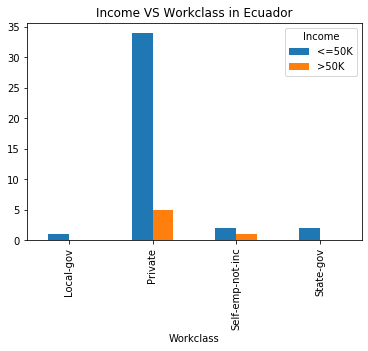

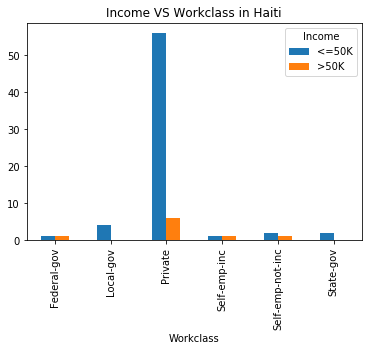

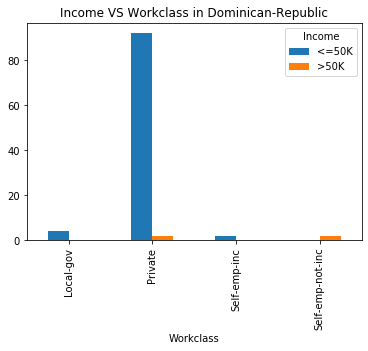

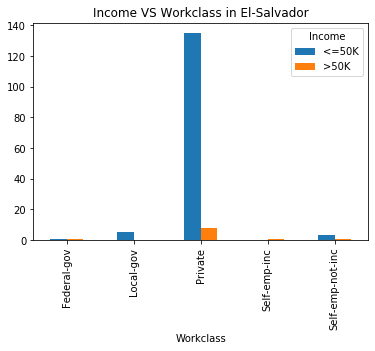

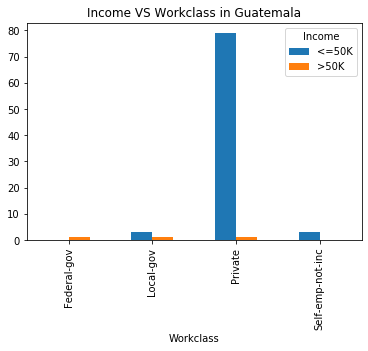

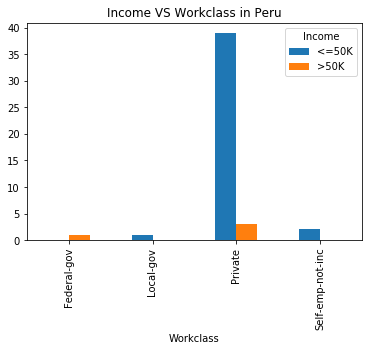

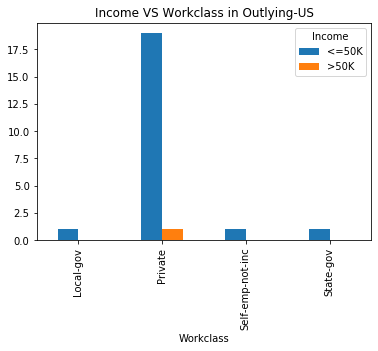

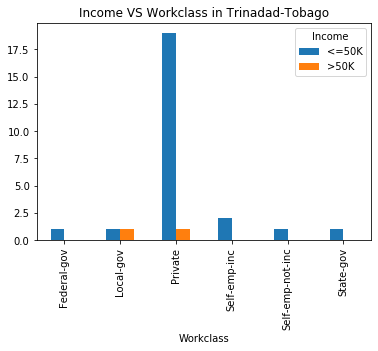

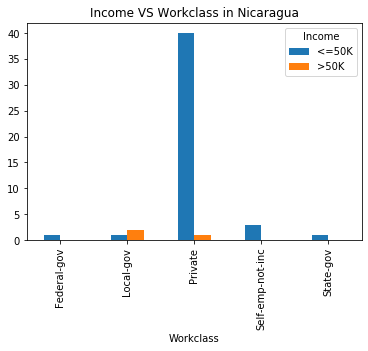

In [39]:
Workclass_VS_Income('America')

### B.2.3- For Europe

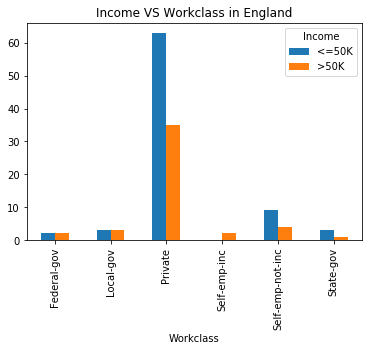

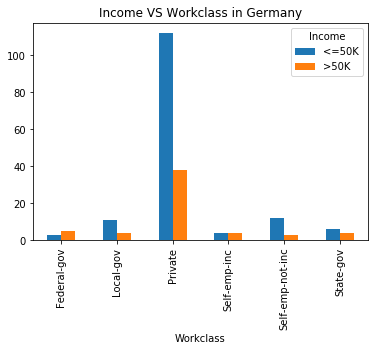

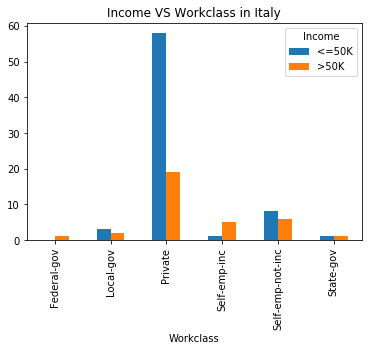

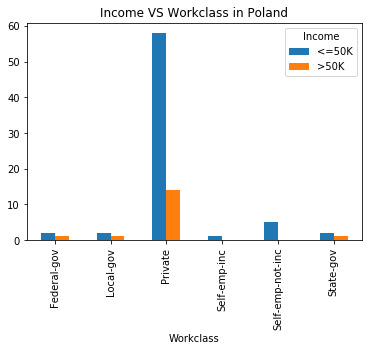

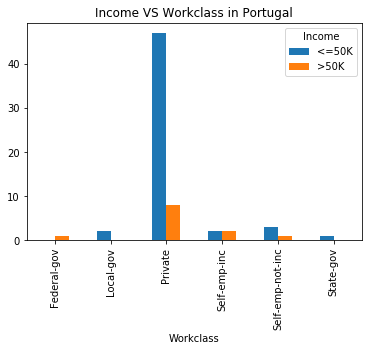

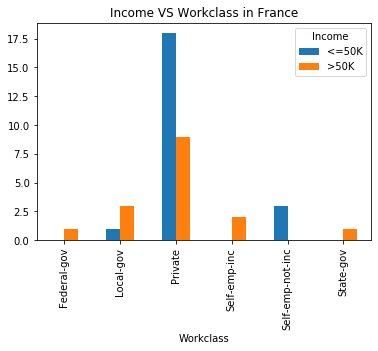

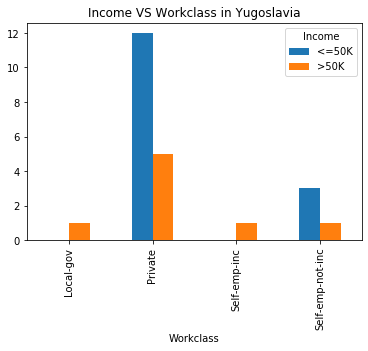

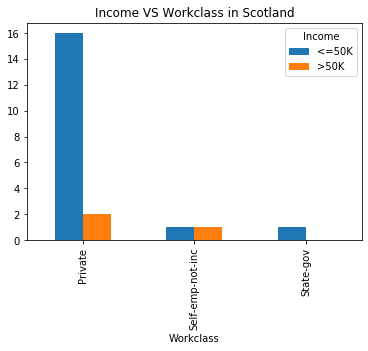

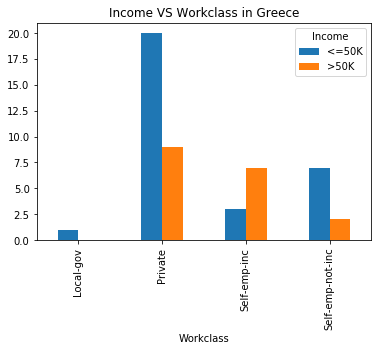

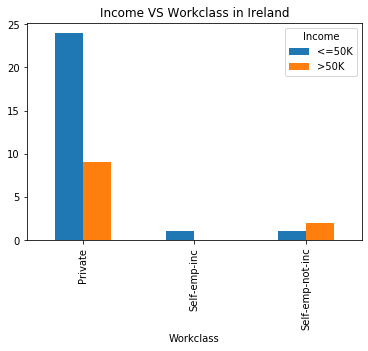

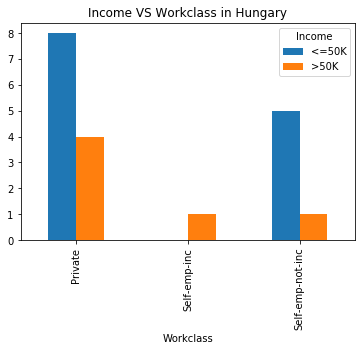

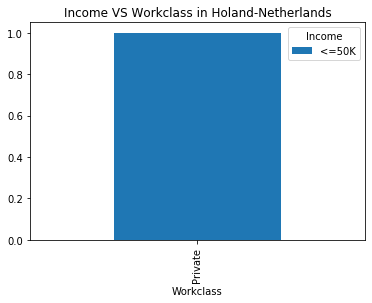

In [40]:
Workclass_VS_Income('Europe')

## B.3- Income VS Marital Status for countries in each continent  

In [41]:
def MaritalStatus_VS_Income(continent):
    choice = df_no_outliers[df_no_outliers['Continent']==continent] 
    countries = list(choice['Country'].unique())

    for country in countries:
        pd.crosstab(choice[choice['Country']==country]['Martial Status'], choice[choice['Country']==country].Income).plot(kind='bar', 
                                                                                                                       title='Income VS Workclass in {}'.format(country))

### B.3.1- For Asia

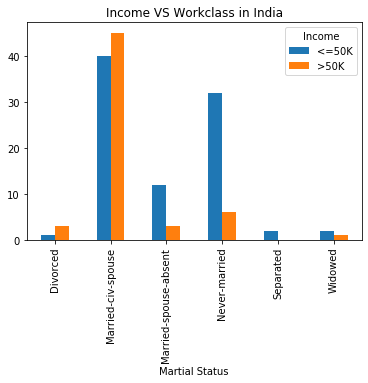

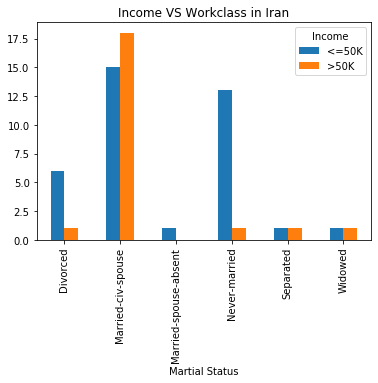

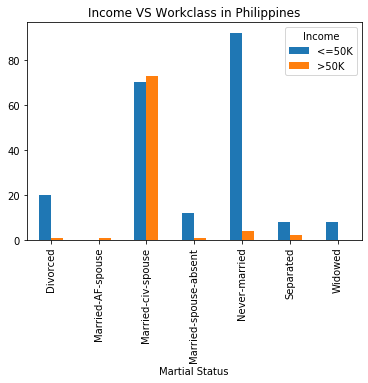

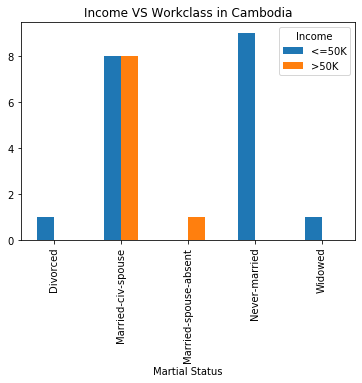

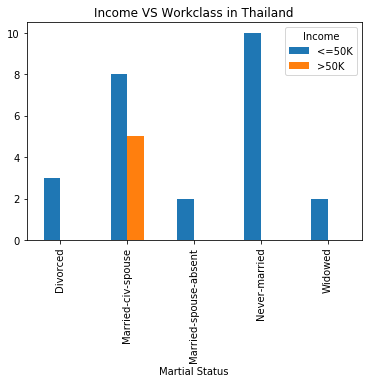

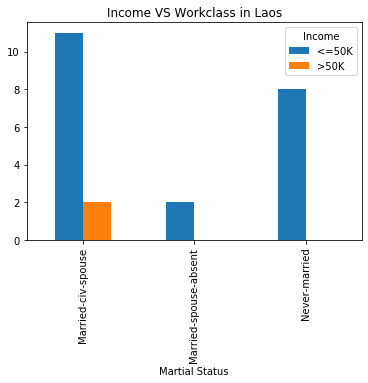

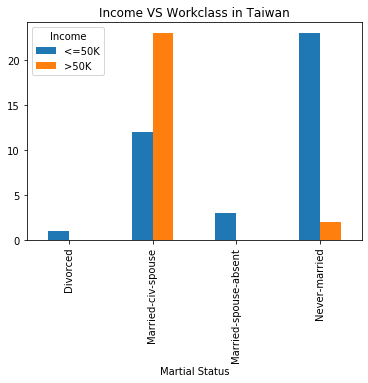

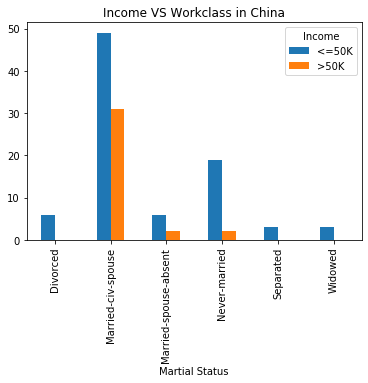

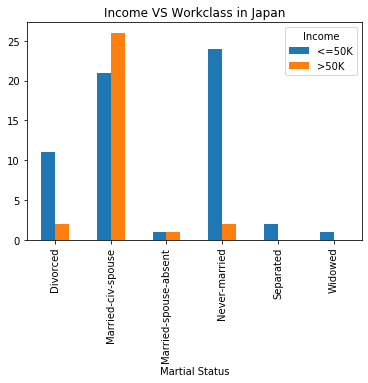

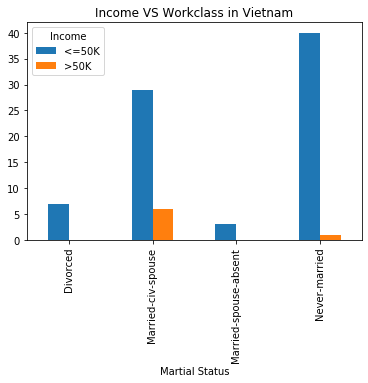

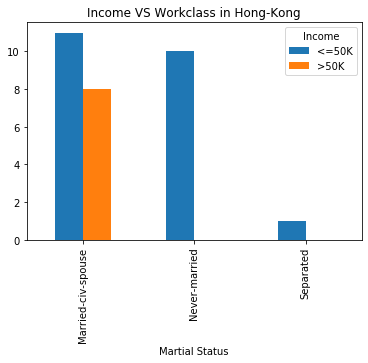

In [42]:
MaritalStatus_VS_Income('Asia')

### B.3.2- For America

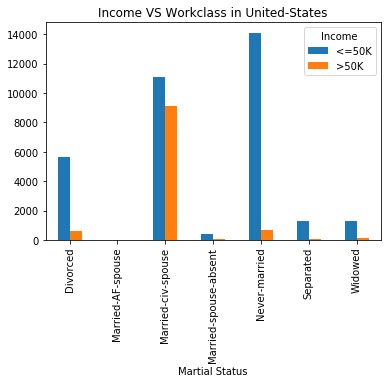

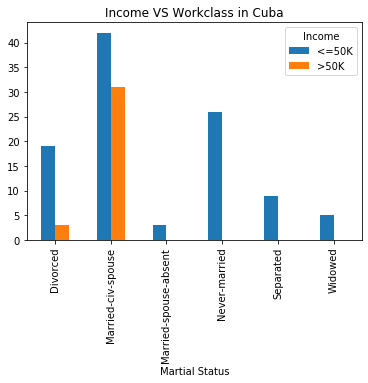

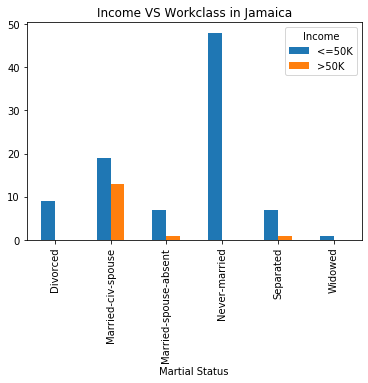

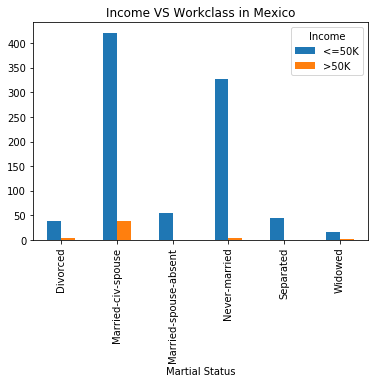

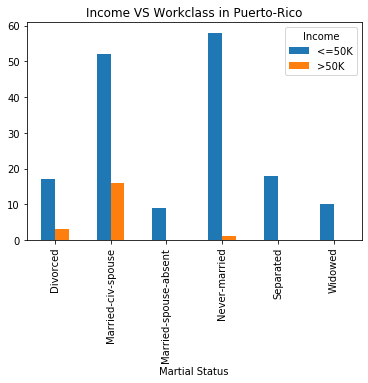

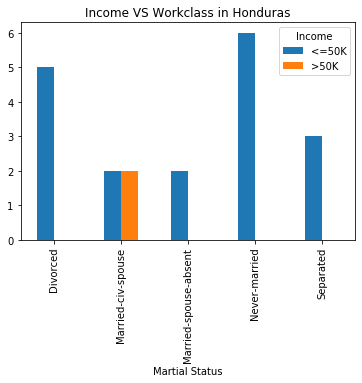

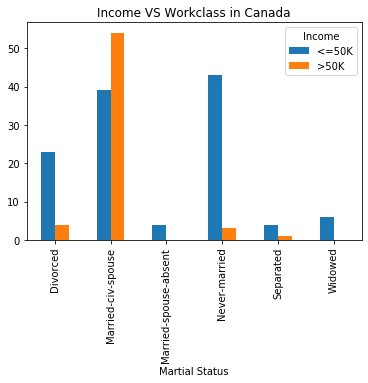

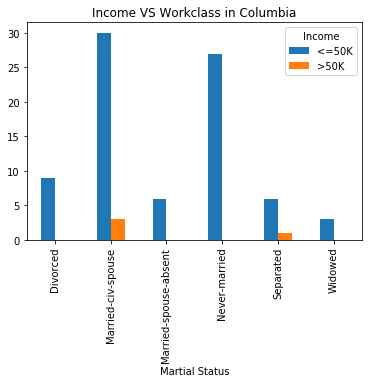

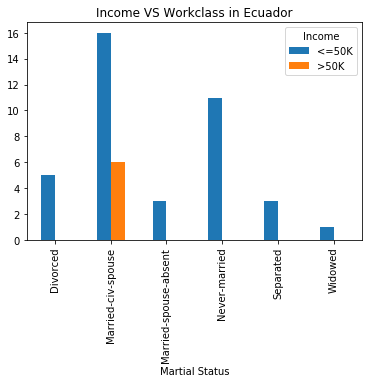

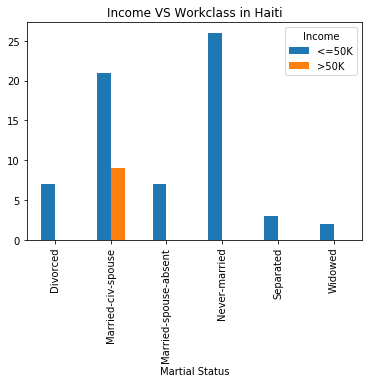

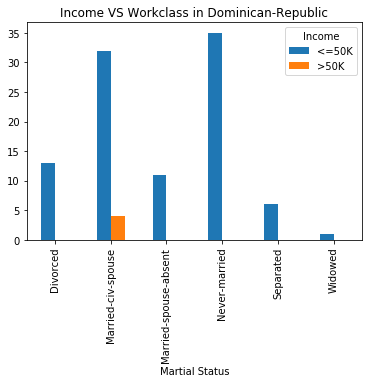

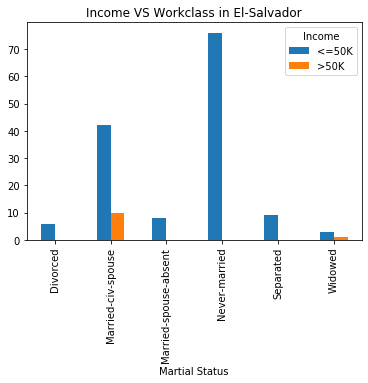

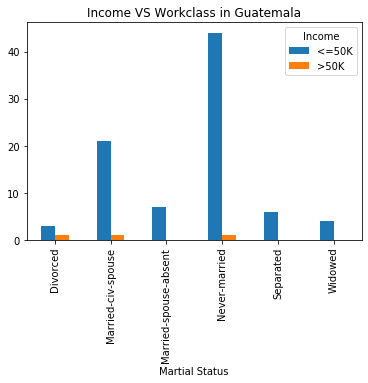

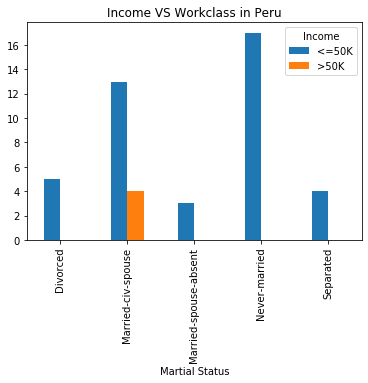

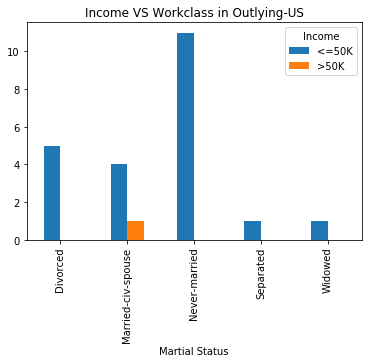

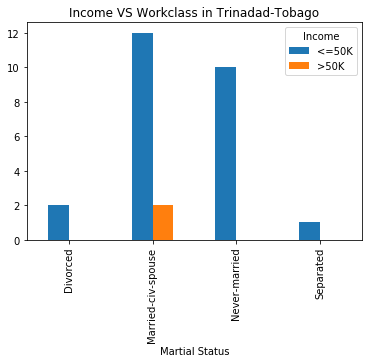

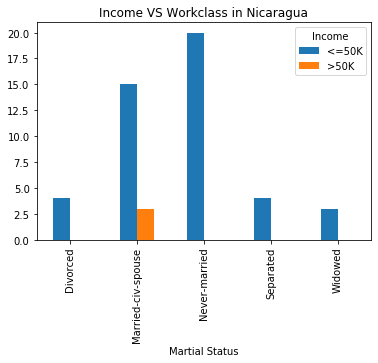

In [43]:
MaritalStatus_VS_Income('America')

### B.3.3- For Europe

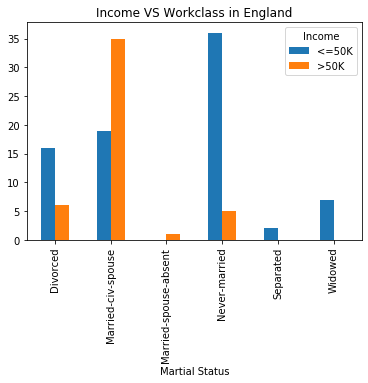

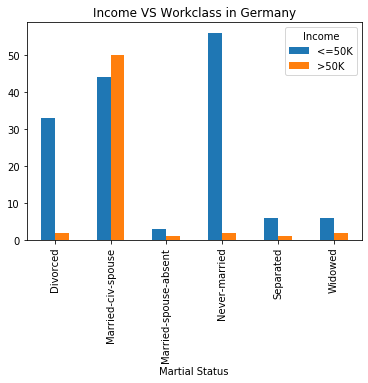

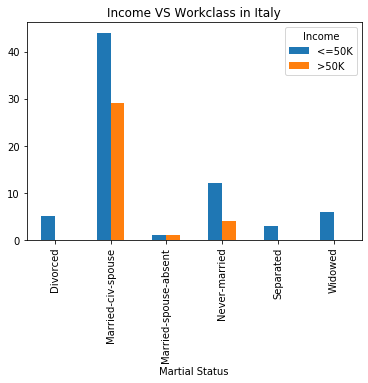

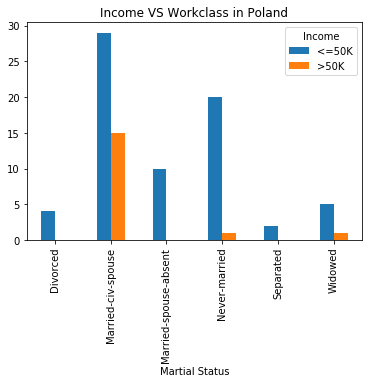

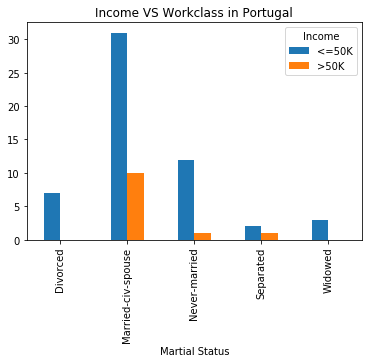

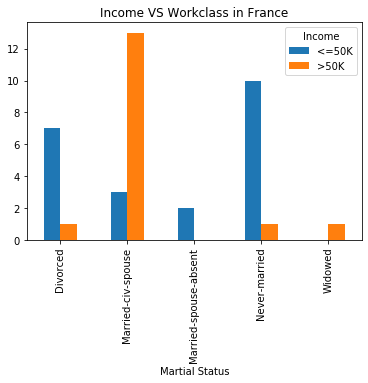

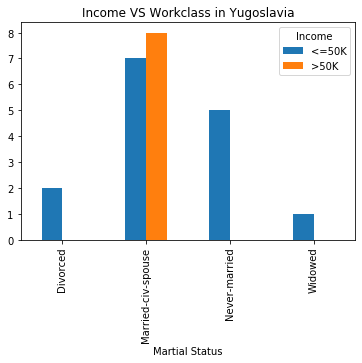

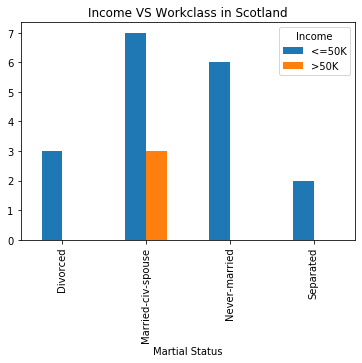

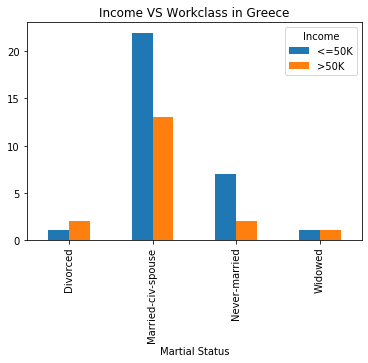

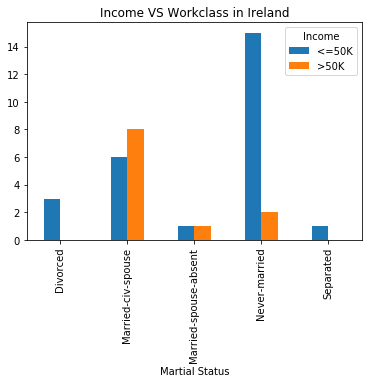

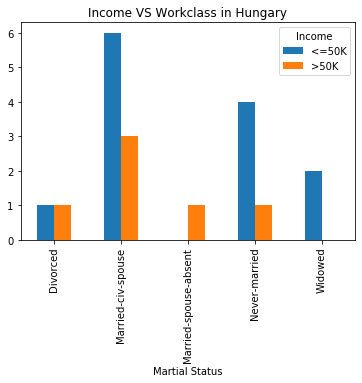

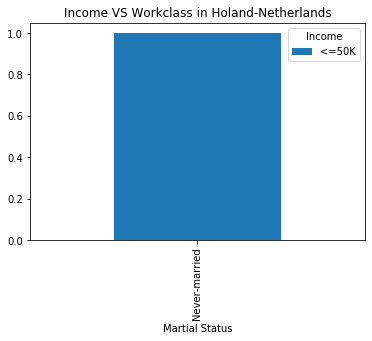

In [44]:
MaritalStatus_VS_Income('Europe')

## B.4- Mean Capital Gain VS Martial Status for each continent

To accomplish this task; I will create a new dataframe containing the grouping result of Continent, Contient, Marital Status and the **mean value of Capital Gain**

In [45]:
# reset_index(): to convert to aggregation result to a pandas dataframe.
agg_df = df_no_outliers.groupby(['Continent','Country', 'Martial Status'])['Capital-Gain'].mean().reset_index()

In [46]:
agg_df['Mean_Capital_Gain'] = agg_df['Capital-Gain']
agg_df.drop('Capital-Gain', axis=1, inplace=True)

In [47]:
agg_df.head()

,Continent,Country,Martial Status,Mean_Capital_Gain
0,America,Canada,Divorced,0.000000
1,America,Canada,Married-civ-spouse,1338.698925
2,America,Canada,Married-spouse-absent,0.000000
3,America,Canada,Never-married,0.000000
4,America,Canada,Separated,0.000000


In [48]:
def Mean_TotCapital_VS_Marital_Status(continent):
    choice = agg_df[agg_df['Continent']==continent] 
    countries = list(choice['Country'].unique())

    for country in countries:
        df_c = choice[choice['Country']==country]
        ax = sns.catplot(x='Martial Status', y='Mean_Capital_Gain', 
                         kind='bar', data=df_c)

        ax.fig.suptitle('Country: {}'.format(country))
        ax.fig.autofmt_xdate()

### B.4.1- For Asia

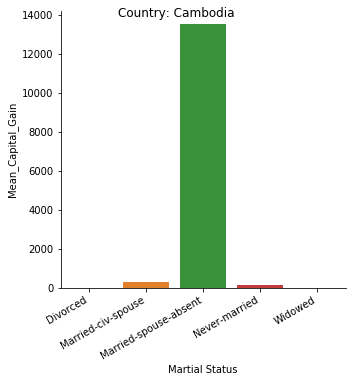

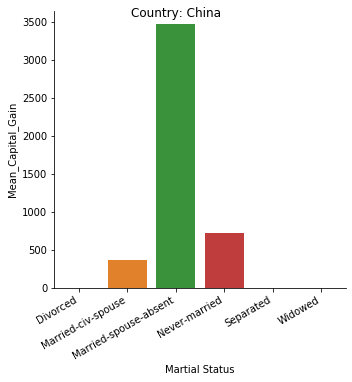

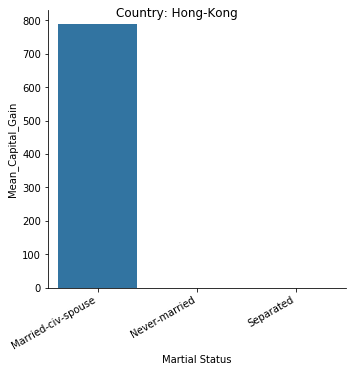

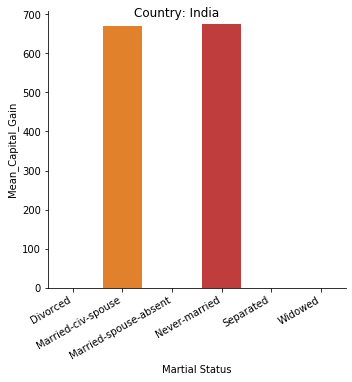

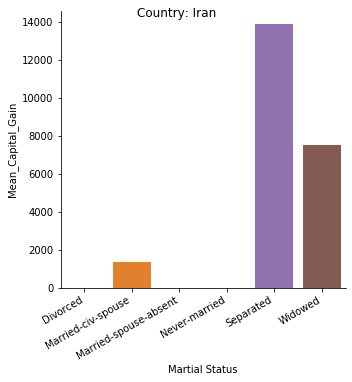

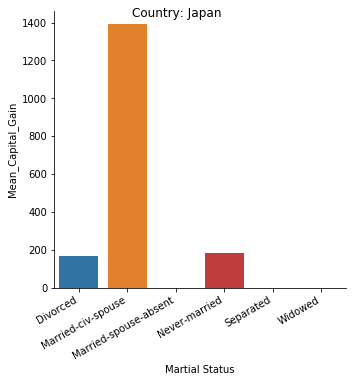

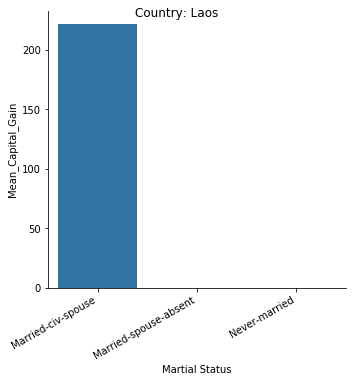

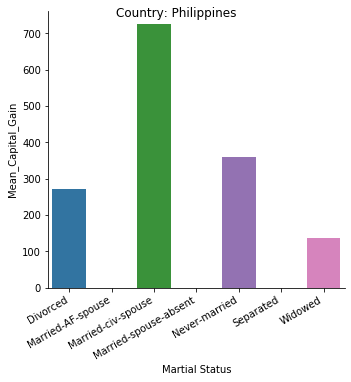

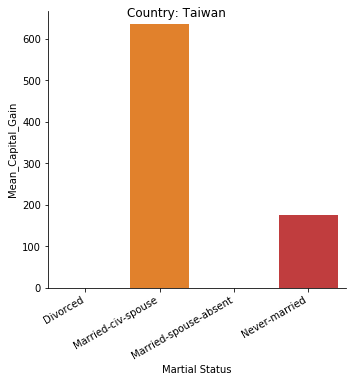

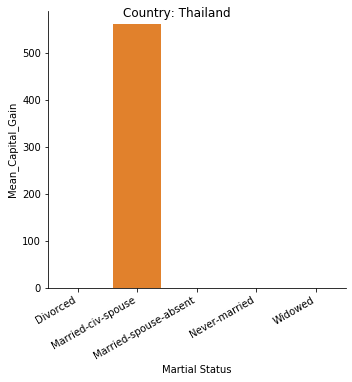

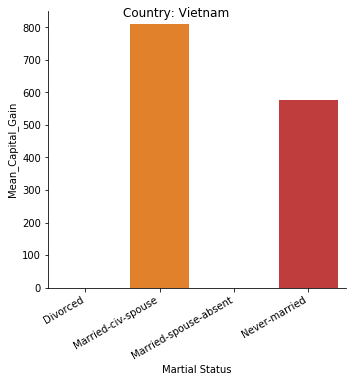

In [49]:
Mean_TotCapital_VS_Marital_Status('Asia')

### B.4.2- For America

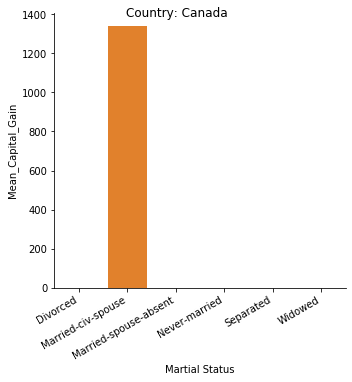

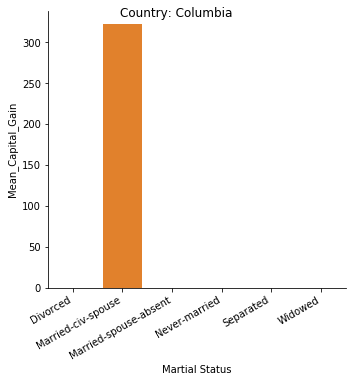

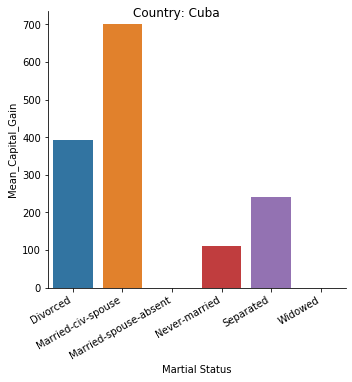

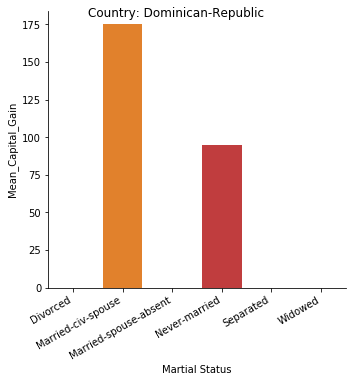

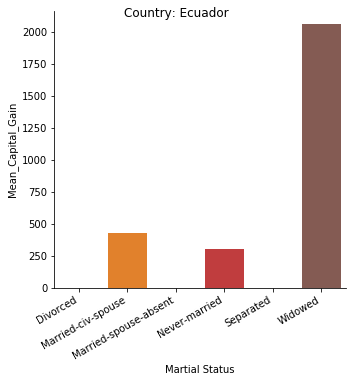

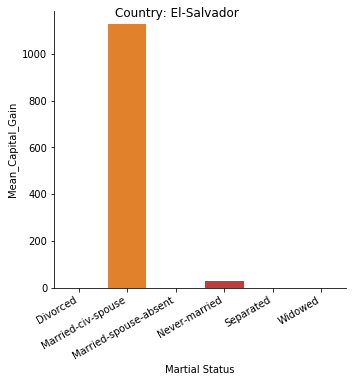

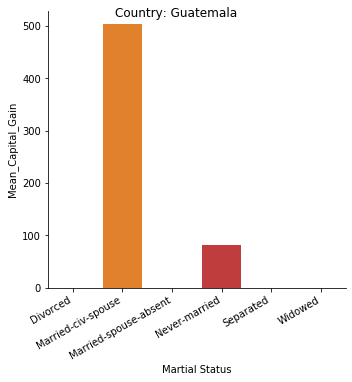

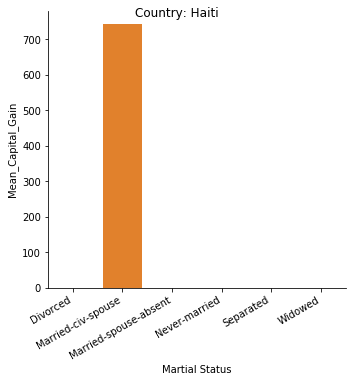

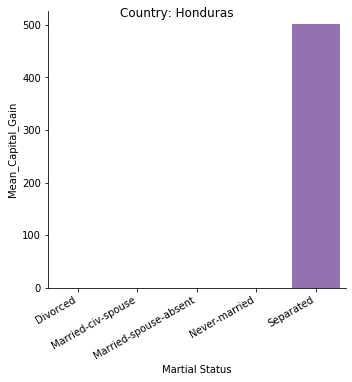

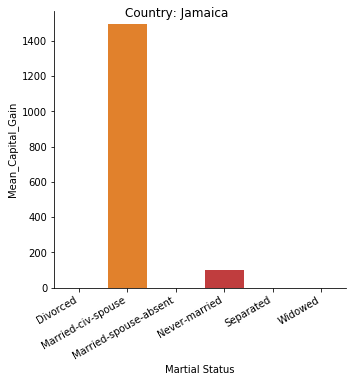

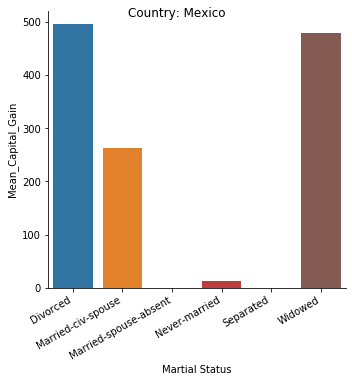

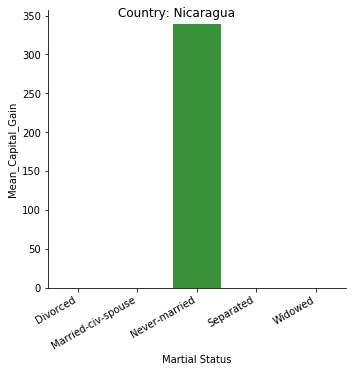

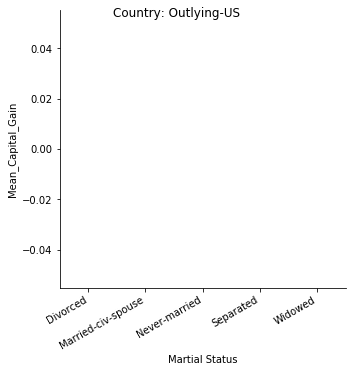

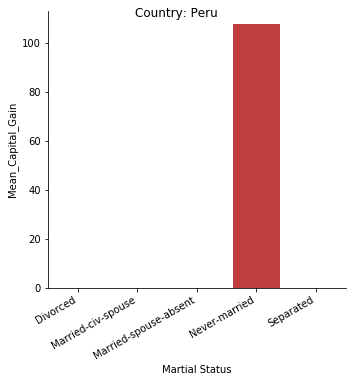

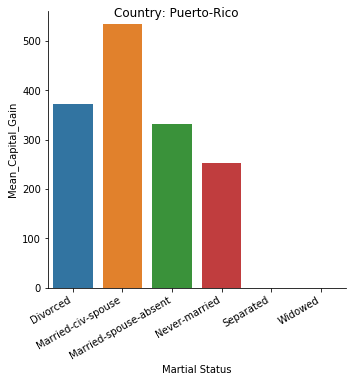

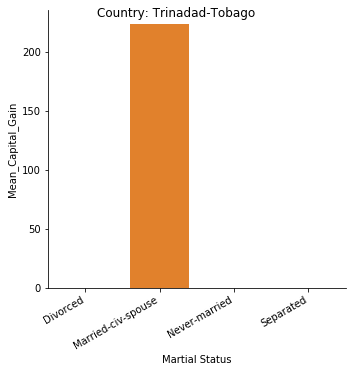

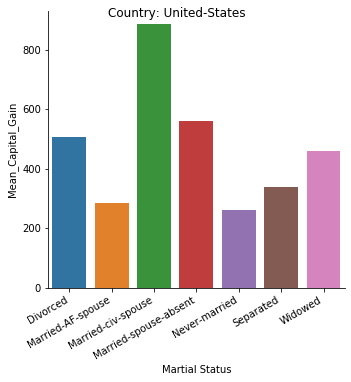

In [50]:
Mean_TotCapital_VS_Marital_Status('America')

### B.4.3- For Europe

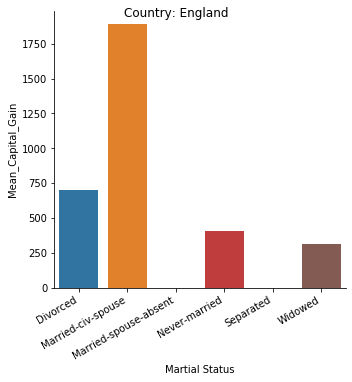

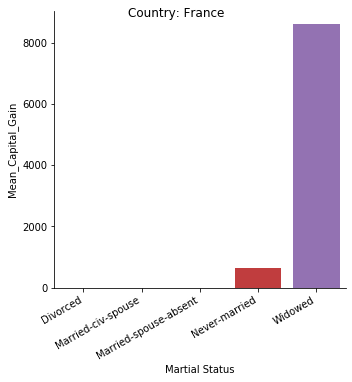

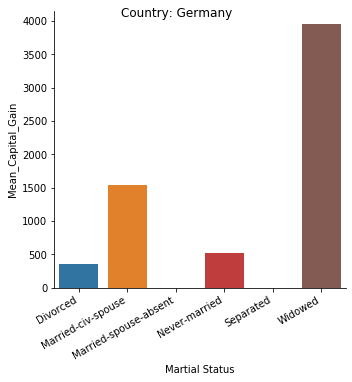

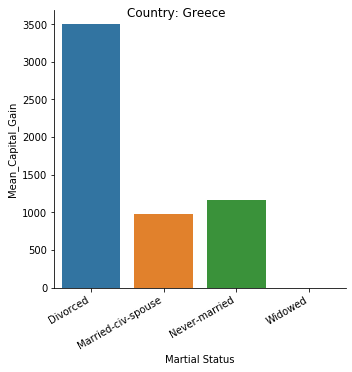

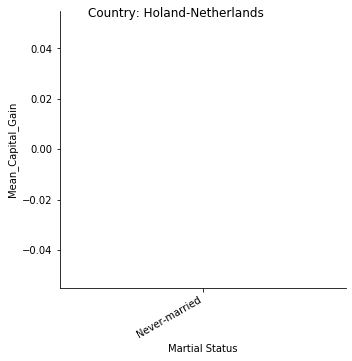

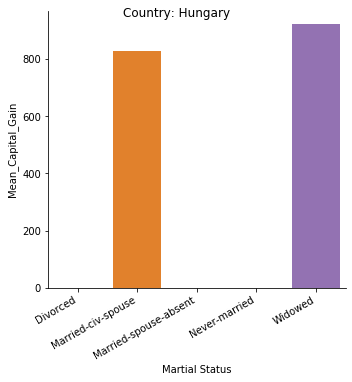

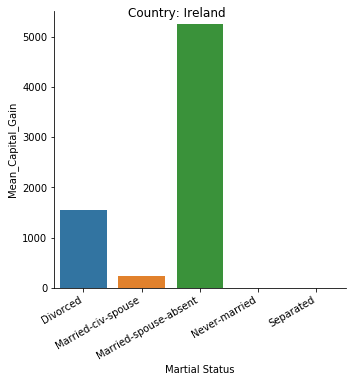

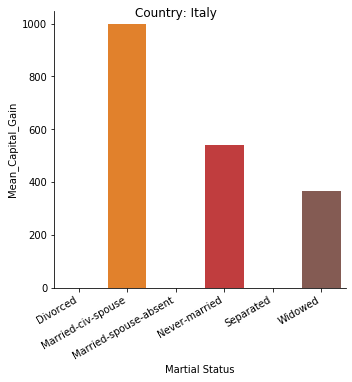

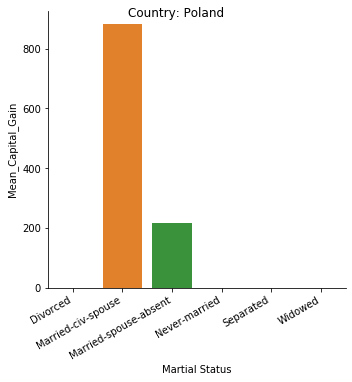

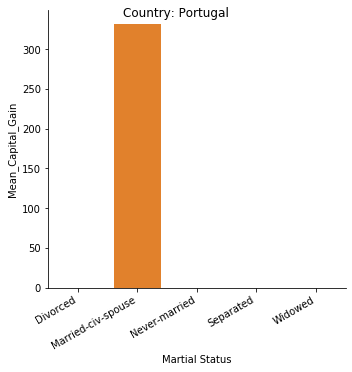

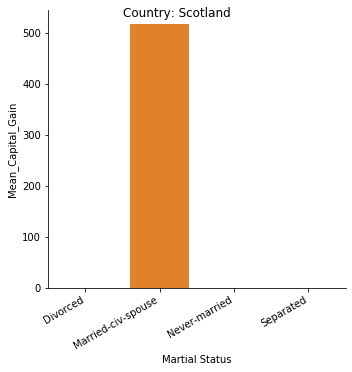

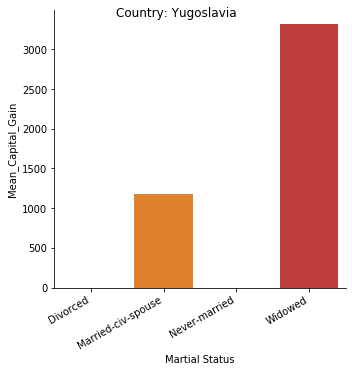

In [51]:
Mean_TotCapital_VS_Marital_Status('Europe')

**Go to the next step with 4_Feature.ipynb**